<a href="https://colab.research.google.com/github/zzwony/Start_0920/blob/main/12_14_1DConvnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1D 컨브넷
- Conv1D 층을 사용하여 구현. Conv2D와 인터페이스가 비슷함. (samples, time, features) 크기의 3D텐서를 입력 받고 비슷한 형태의 3D 텐서를 반환.
- 합성곱 윈도우는 시간 축의 1D 윈도우이며 입력텐서의 두번째 축이다.

In [ ]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features=10000
max_len=500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), len(y_test))

17464789/17464789 [==============================] - 2s 0us/step
25000 25000


In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print(x_train.shape, x_test.shape)

(25000, 500) (25000, 500)


In [ ]:
# Conv1D를 사용하여 모델 구성
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
# 완전 연결층에 연결할때 Flatten 대신 GlobalMaxPooling1D를 사용한다.
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
from keras.optimizers.optimizer_v1 import Optimizer
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 11s 13ms/step - loss: 0.7334 - acc: 0.5275 - val_loss: 0.6846 - val_acc: 0.5742
Epoch 2/10
157/157 [==============================] - 2s 10ms/step - loss: 0.6633 - acc: 0.6802 - val_loss: 0.6605 - val_acc: 0.6500
Epoch 3/10
157/157 [==============================] - 2s 10ms/step - loss: 0.6127 - acc: 0.7638 - val_loss: 0.5936 - val_acc: 0.7422
Epoch 4/10
157/157 [==============================] - 2s 10ms/step - loss: 0.5031 - acc: 0.8163 - val_loss: 0.4638 - val_acc: 0.8214
Epoch 5/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3897 - acc: 0.8539 - val_loss: 0.4137 - val_acc: 0.8454
Epoch 6/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3280 - acc: 0.8790 - val_loss: 0.3878 - val_acc: 0.8588
Epoch 7/10
157/157 [==============================] - 2s 10ms/step - loss: 0.2897 - acc: 0.8966 - val_loss: 0.4125 - val_acc: 0.8600
Epoch 8/10
157/157 [==============================] - 2s 10ms/step -

검증 정확도는 LSTM(0.88) 보다 조금 낮지만 CPU, GPU에서 더 빠르게 실행됨. 이는 단어 수준의 감성분류 작업에 순환네트워크를 대신하여 빠르고 경제적인 1D 컨브넷을 사용할 수 있음을 보여준다.

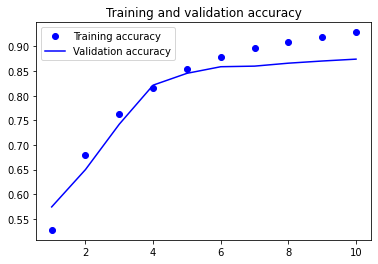

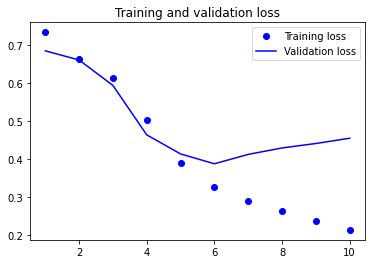

In [ ]:
# 시각화
import matplotlib.pyplot as plt
accuracy = history.history["acc"]
val_accuracy = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

한계
- 1) 윈도우 사이즈만 가능하다.
- 2) 단어수준의 감성분석은 괜찮지만 굉장히 복잡하고 긴건 힘들다.